In [1]:
from scipy.linalg import svd
import numpy as np
np.set_printoptions(precision=3, suppress=True)

In [2]:
a = np.random.rand(4, 5) + 1j * np.random.rand(4, 5)
u, s, vh = svd(a)

In [3]:
u @ u.T.conjugate() # u is unitary. Its columns are left singular vectors

array([[ 1.+0.j,  0.+0.j, -0.-0.j,  0.+0.j],
       [ 0.-0.j,  1.+0.j, -0.+0.j, -0.+0.j],
       [-0.+0.j, -0.-0.j,  1.+0.j, -0.-0.j],
       [ 0.-0.j, -0.-0.j, -0.+0.j,  1.+0.j]])

In [4]:
vh @ vh.T.conjugate() # Rows of vh are right singular vectors

array([[ 1.+0.j, -0.+0.j,  0.-0.j,  0.+0.j, -0.-0.j],
       [-0.-0.j,  1.+0.j, -0.-0.j, -0.-0.j,  0.+0.j],
       [ 0.+0.j, -0.+0.j,  1.+0.j,  0.-0.j, -0.-0.j],
       [ 0.+0.j, -0.+0.j,  0.+0.j,  1.+0.j,  0.-0.j],
       [-0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j,  1.+0.j]])

In [5]:
s # Only the diagonal entries of Sigma are returned in s

array([2.981, 0.98 , 0.76 , 0.32 ])

In [6]:
a = np.random.rand(4, 5)
u, s, vh = svd(a)

In [7]:
u[0, :, np.newaxis] @ vh[np.newaxis, 0, :]

array([[ 0.19 ,  0.173,  0.193,  0.211,  0.194],
       [-0.03 , -0.027, -0.03 , -0.033, -0.031],
       [-0.383, -0.348, -0.389, -0.425, -0.391],
       [-0.106, -0.096, -0.108, -0.117, -0.108]])

In [8]:
np.outer(u[0, :], vh[0, :])


array([[ 0.19 ,  0.173,  0.193,  0.211,  0.194],
       [-0.03 , -0.027, -0.03 , -0.033, -0.031],
       [-0.383, -0.348, -0.389, -0.425, -0.391],
       [-0.106, -0.096, -0.108, -0.117, -0.108]])

In [10]:
ar = np.zeros_like(a)
for i in range(4):
    ar += np.outer(u[:, i], s[i] * vh[i, :])

In [11]:
a - ar # a and ar are identical

array([[ 0.,  0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0., -0.,  0.,  0.,  0.],
       [ 0.,  0., -0.,  0.,  0.]])

In [12]:
a = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(a)

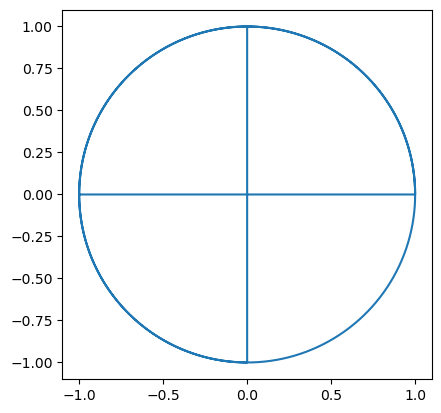

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def show(c):
    plt.plot(c[0, :], c[1, :])
    plt.axis('image');
# plot the unit circle and axis segments:

t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
c = np.array([np.concatenate([l, np.cos(t), z]),
np.concatenate([z, np.sin(t), l])])
show(c)

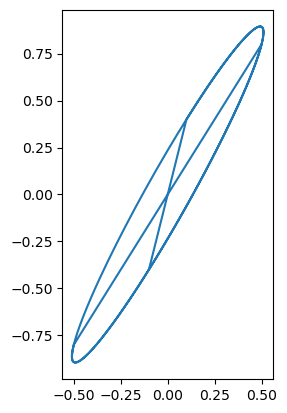

In [16]:
show(a @ c)

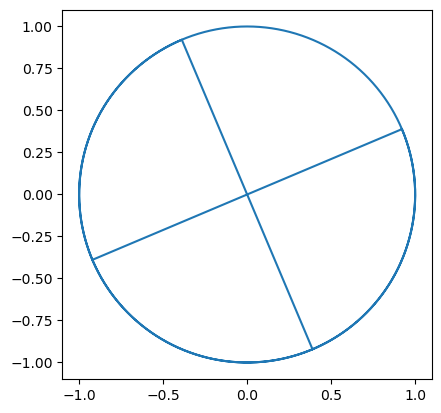

In [17]:
show(vh @ c)

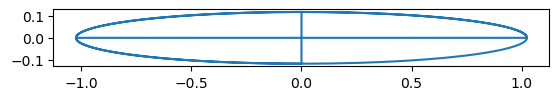

In [18]:
show(np.diag(s) @ c)

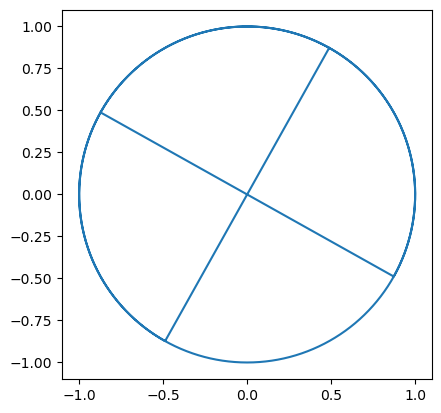

In [19]:
show(u @ c)

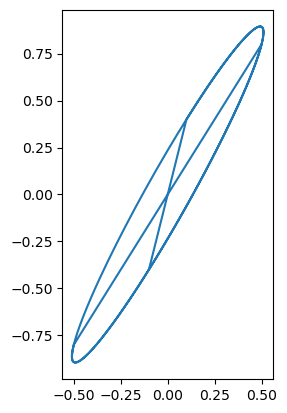

In [35]:
show(u @ np.diag(s) @ vh @ c)

In [37]:
cats = plt.imread('cat picture.png')
cats.shape

(1107, 1400, 4)

In [38]:
np.linalg.norm(cats[..., 0] - cats[..., 2], 'fro')

65.51806

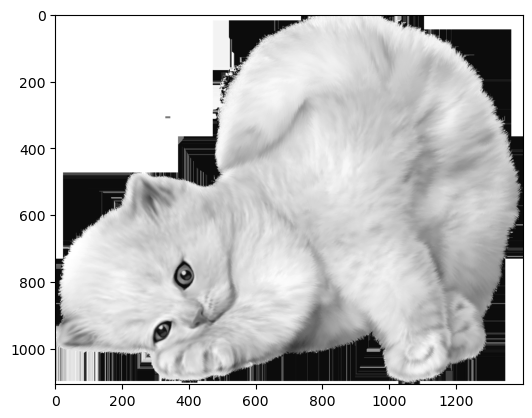

In [39]:
c = cats[..., 0]
plt.imshow(c, cmap='gray');

In [40]:
u, s, vh = svd(c)

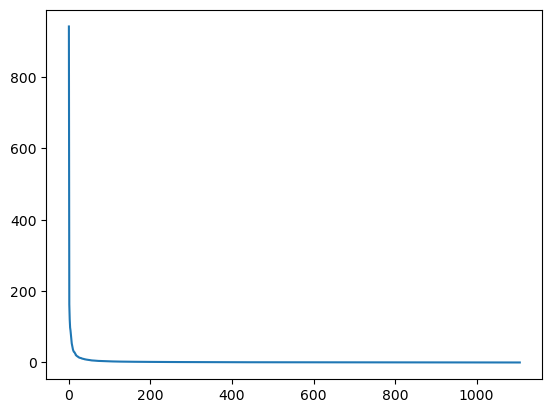

In [41]:
plt.plot(s);

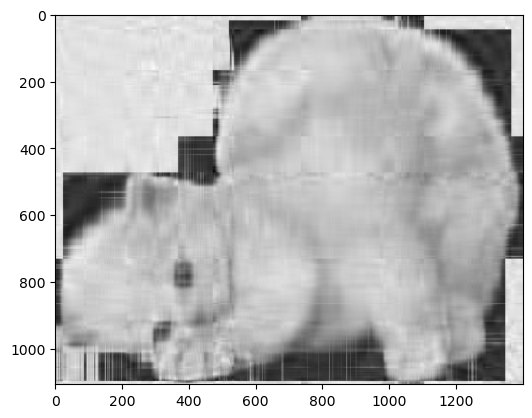

In [42]:
# Rank 20 approximation of the cats:
l = 20; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

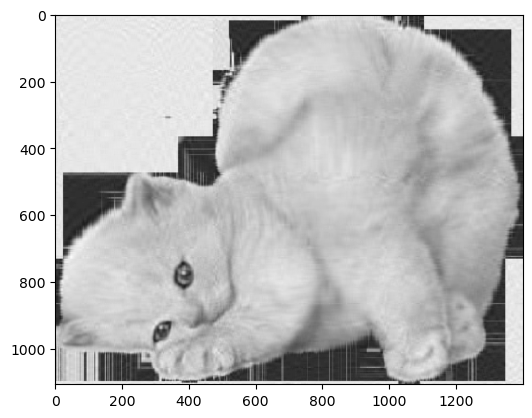

In [43]:
# Rank 50 approximation of the cats:
l = 50; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

In [44]:
relative_error = 1.e-1

In [45]:
s2 = s**2
total = np.sum(s2)
diff = np.sqrt((total - np.add.accumulate(s2)) / total)
l = np.argmax(diff < relative_error) + 1
l

14

In [46]:
cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]

In [47]:
np.linalg.norm(c - cl, 'fro') / np.linalg.norm(c, 'fro')

0.09616828

In [48]:
u.shape[0] * l + l + l * vh.shape[0]

35112

In [49]:
c.shape[0] * c.shape[1]

1549800